In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Loading the data

In [2]:
df = pd.read_csv('../data/housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Preparing X and y (target) Variables

- Target Variable (y) - price, as we want to estimate the housing prices depending the historical data that we have.
- Independent (X) - columns other than the target variable will be the independent variables, and therefore will the cornerstones in defining the nature of the target variable.

In [12]:
X = df.drop(columns='price', axis=1)

In [7]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Target Variable Normalization
The price column has housing prices all in millions. Therefore, to make the calculation either, it has to be normalized. We will divide the prices by 1M and replace the column

In [14]:
df['price_in_millions'] = df['price'] / 1e6
df['price_in_millions']

0      13.30000
1      12.25000
2      12.25000
3      12.21500
4      11.41000
         ...   
540     1.82000
541     1.76715
542     1.75000
543     1.75000
544     1.75000
Name: price_in_millions, Length: 545, dtype: float64

In [16]:
df.drop(columns='price', axis=1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_in_millions
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.30000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.25000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.25000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.21500
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.41000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1.82000
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1.76715
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1.75000
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1.75000


In [17]:
df['price'] = df['price_in_millions']
df.drop(columns="price_in_millions", axis=1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13.30000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12.25000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12.25000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12.21500,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11.41000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1.76715,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1.75000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1.75000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [18]:
y=df['price']
y.head()

0    13.300
1    12.250
2    12.250
3    12.215
4    11.410
Name: price, dtype: float64

## Inspecting the categorical columns

In [11]:
print("Categories in 'mainroad' variable:     ",end=" " )
print(df['mainroad'].unique())

print("Categories in 'guestroom' variable:   ",end=" " )
print(df['guestroom'].unique())

print("Categories in 'basement' variable:    ",end=" " )
print(df['basement'].unique())

print("Categories in 'hotwaterheating' variable: ",end=" " )
print(df['hotwaterheating'].unique())

print("Categories in 'airconditioning' variable: ",end=" " )
print(df['airconditioning'].unique())

print("Categories in 'prefarea' variable:    ",end=" " )
print(df['prefarea'].unique())

print("Categories in 'furnishingstatus' variable: ",end=" " )
print(df['furnishingstatus'].unique())



Categories in 'mainroad' variable:      ['yes' 'no']
Categories in 'guestroom' variable:    ['no' 'yes']
Categories in 'basement' variable:     ['no' 'yes']
Categories in 'hotwaterheating' variable:  ['no' 'yes']
Categories in 'airconditioning' variable:  ['yes' 'no']
Categories in 'prefarea' variable:     ['yes' 'no']
Categories in 'furnishingstatus' variable:  ['furnished' 'semi-furnished' 'unfurnished']


Except for ***furnishingstatus*** column, which has ***furnished, semi-furnished, unfurnished*** values, all other categorical variables have yes or no values

### Creating preprocessor for data transformation

In [19]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [20]:
X = preprocessor.fit_transform(X)

In [21]:
X.shape

(545, 20)

### Creating Training and Test Sets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((436, 20), (109, 20))

### Creating Evaluation Function

In [26]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### Creating a models dictionary for comparison

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

### Performing model training, prediction and evaluation

In [29]:

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.9841
- Mean Absolute Error: 0.7192
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3245
- Mean Absolute Error: 0.9700
- R2 Score: 0.6529


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.7560
- Mean Absolute Error: 1.3507
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2683
- Mean Absolute Error: 1.7486
- R2 Score: -0.0179


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.9841
- Mean Absolute Error: 0.7188
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3254
- Mean Absolute Error: 0.9707
- R2 Score: 0.6525


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.9034
- Mean Absolute Error: 0.6294
- R2 Score: 0.7353
----------------------

### Sorting the models interms of thier R2 Score

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.652924
2,Ridge,0.652460
7,CatBoosting Regressor,0.641121
5,Random Forest Regressor,0.623370
6,XGBRegressor,0.594014
8,AdaBoost Regressor,0.556562
3,K-Neighbors Regressor,0.537912
4,Decision Tree,0.454087
1,Lasso,-0.017926


Linear Regression leads the way with R2 score of 0.65, and Lasso is the worst performing model in this case with -0.02. Due to the significantly small dataset we are using all models are performing poorly.

In [31]:
best_model = LinearRegression(fit_intercept=True)
best_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 65.29


In [36]:
# display y_test and y_pred values in tabular format
results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred,
    'Difference' : y_pred - y_test.values
})

# Display the first 10 rows
results_df.head(10)

,Actual Price,Predicted Price,Difference
0,4.060,5.164654,1.104654
1,6.650,7.224722,0.574722
2,3.710,3.109863,-0.600137
3,6.440,4.612075,-1.827925
4,2.800,3.294646,0.494646
5,4.900,3.532275,-1.367725
6,5.250,5.611775,0.361775
7,4.543,6.368146,1.825146
8,2.450,2.722857,0.272857
9,3.353,2.629406,-0.723594


Text(0, 0.5, 'Predicted')

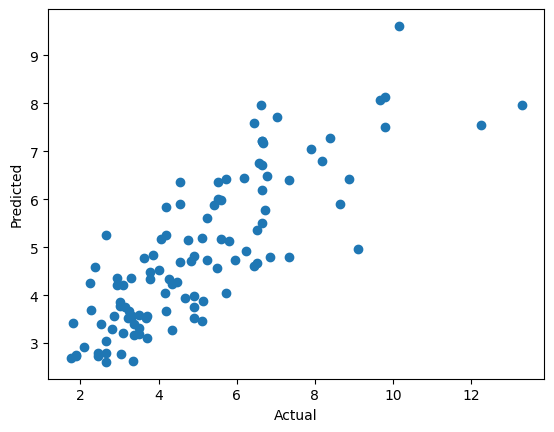

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

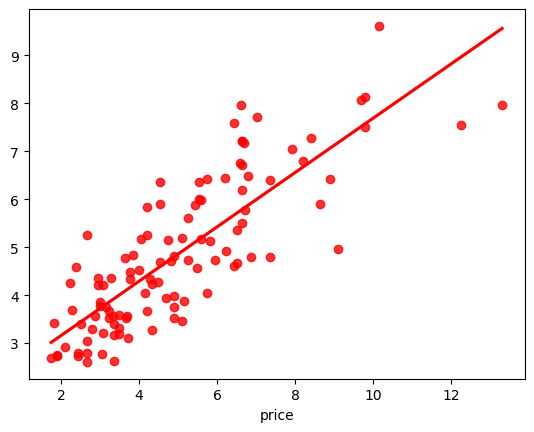

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');